**pY71-LacZ Reporter**

Converts the raw data from Figure_1_Raw_Data_LacZ to an excel file with the calculated time to half max signal and half maximum signal for a constitutive sfGFP reporter in cell-free reactions.

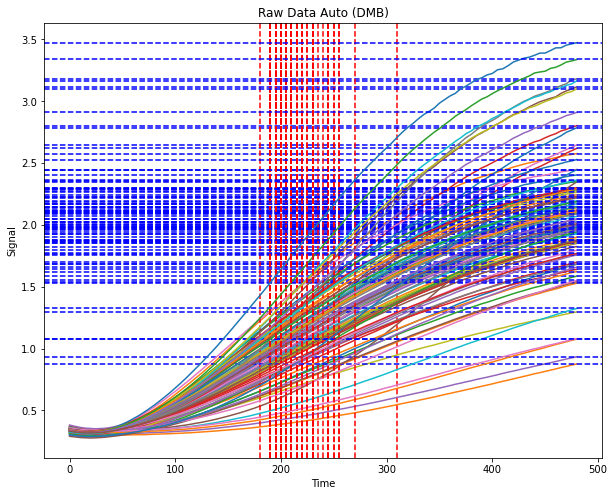

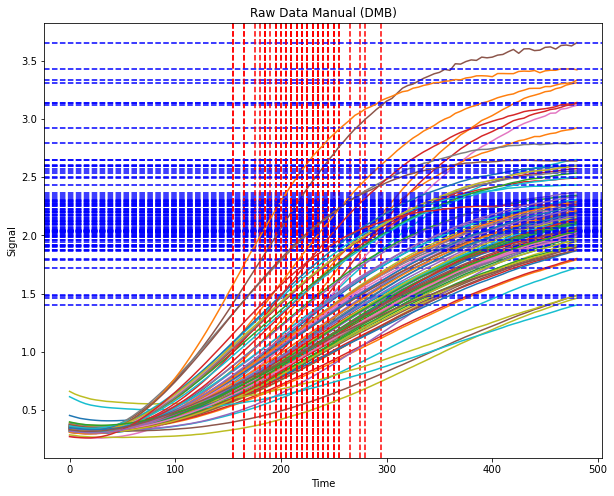

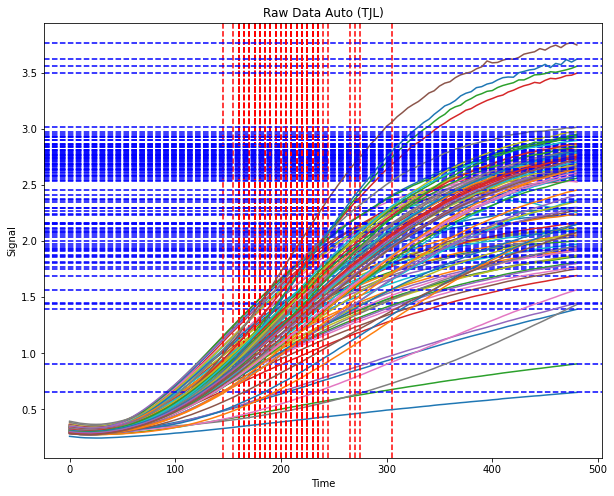

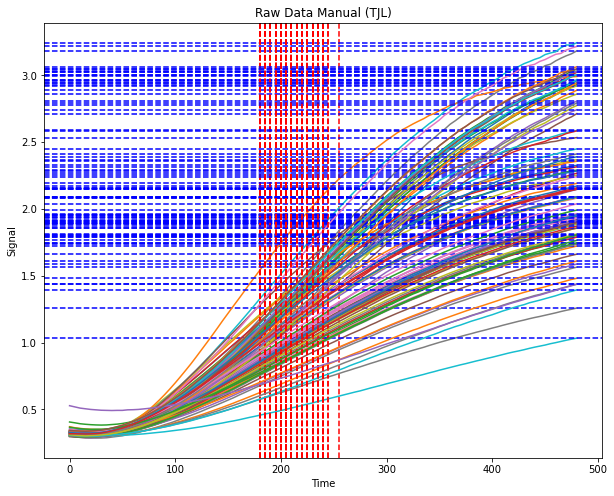

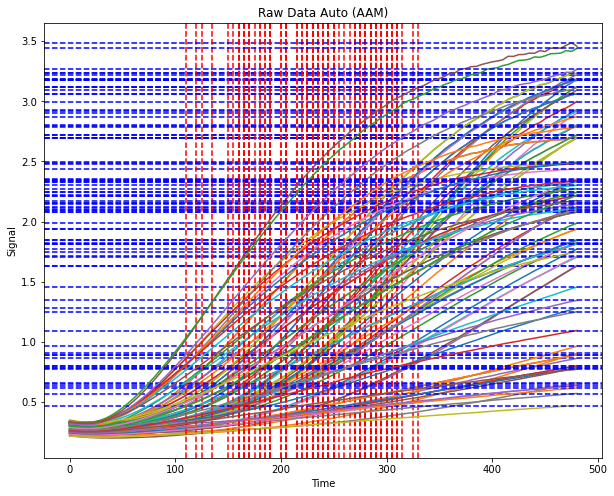

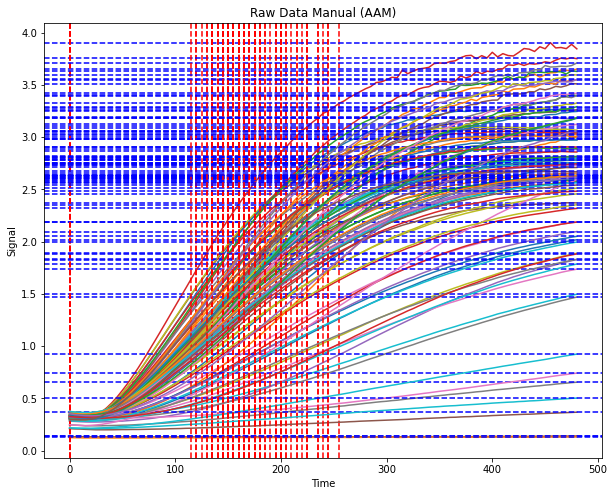

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
xlsx_file = pd.ExcelFile('/Users/dylan/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/77_CBC_Objective_3_Sensor_Scaleup/Supplemental_Information/Supporting Data and Python Files/Supp_Data_Figure_1/Figure_1_Raw_Data_LacZ.xlsx')
sheet_names = xlsx_file.sheet_names

# Create empty dictionaries to store half-maximum times and maximum signals
half_times = {}
max_signals = {}

# Loop through all sheets
for sheet_name in sheet_names:
    # Read data from sheet
    df = pd.read_excel(xlsx_file, sheet_name=sheet_name)
    x = df['time'].tolist()

    # Create a figure to plot the curves for this sheet
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create empty dictionaries to store half-maximum times and maximum signals for this sheet
    sheet_half_times = {}
    sheet_max_signals = {}

    # Loop through all columns except the 'time' column
    for column in df.columns[1:]:
        y = df[column].tolist()

        # Find half-time
        def find_half_time(x, y):
            max_signal = max(y)
            half_signal = max_signal / 2.0
            for i in range(len(y)):
                if y[i] >= half_signal:
                    return x[i]
            return None

        # Call the function to find half-time
        half_time = find_half_time(x, y)

        # Store half-time in dictionary
        sheet_half_times[str(column)] = half_time

        # Find maximum signal
        max_signal = max(y)

        # Store maximum signal in dictionary
        sheet_max_signals[str(column)] = max_signal

        # Plot the curve and the vertical line (if half_time is not None)
        ax.plot(x, y, label=str(column))
        if half_time is not None:
            ax.axvline(x=half_time, color='r', linestyle='--')
        
        # Plot the maximum signal as a horizontal line
        ax.axhline(y=max_signal, color='b', linestyle='--')

    # Set axis labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Signal')
    ax.set_title(sheet_name)

    # Show legend
    #ax.legend()

    # Show the plot
    plt.show()

    # Store sheet's half-maximum times and maximum signals in the main dictionaries
    half_times[sheet_name] = sheet_half_times
    max_signals[sheet_name] = sheet_max_signals

# Convert dictionaries to dataframes
half_times_df = pd.DataFrame.from_dict(half_times, orient='index')
max_signals_df = pd.DataFrame.from_dict(max_signals, orient='index')

half_times_df.transpose().to_excel('Figure_1_Output_Half_Max_Times_LacZ.xlsx')
max_signals_df.transpose().to_excel('Figure_1_Output_Max_Signals_LacZ.xlsx')


T1/2 vs Maximum Signal Plots for Automated and Manual Reactions with a LacZ Reporter

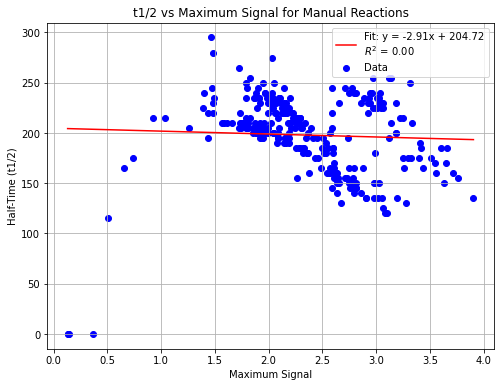

Figure saved as t_half_vs_max_signal_plot_manual_LacZ.svg


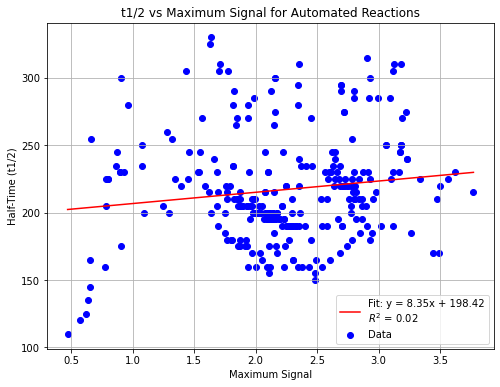

Figure saved as t_half_vs_max_signal_plot_automated_LacZ.svg


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from Excel file
xlsx_file = pd.ExcelFile('/Users/dylan/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/77_CBC_Objective_3_Sensor_Scaleup/Supplemental_Information/Supporting Data and Python Files/Supp_Data_Figure_1/Figure_1_Raw_Data_LacZ.xlsx')
sheet_names = xlsx_file.sheet_names

# Create empty dictionaries to store half-maximum times and maximum signals
half_times_manual = {}
max_signals_manual = {}
half_times_automated = {}
max_signals_automated = {}

# Loop through all sheets
for sheet_name in sheet_names:
    # Check if the sheet is "manual" or "automated" based on its name
    is_manual = "manual" in sheet_name.lower()

    # Read data from the sheet
    df = pd.read_excel(xlsx_file, sheet_name=sheet_name)
    x = df['time'].tolist()

    # Create dictionaries to store half-maximum times and maximum signals for this sheet
    sheet_half_times = {}
    sheet_max_signals = {}

    # Loop through all columns except the 'time' column
    for column in df.columns[1:]:
        y = df[column].tolist()

        # Find half-time
        def find_half_time(x, y):
            max_signal = max(y)
            half_signal = max_signal / 2.0
            for i in range(len(y)):
                if y[i] >= half_signal:
                    return x[i]
            return None

        # Call the function to find half-time
        half_time = find_half_time(x, y)

        # Store half-time in dictionary
        sheet_half_times[column] = half_time

        # Find maximum signal
        max_signal = max(y)

        # Store maximum signal in dictionary
        sheet_max_signals[column] = max_signal

    # Add data to the appropriate dictionary
    if is_manual:
        half_times_manual[sheet_name] = sheet_half_times
        max_signals_manual[sheet_name] = sheet_max_signals
    else:
        half_times_automated[sheet_name] = sheet_half_times
        max_signals_automated[sheet_name] = sheet_max_signals

# Function to process and plot data for a reaction type
def process_and_plot(half_times, max_signals, reaction_type):
    # Convert dictionaries to dataframes
    half_times_df = pd.DataFrame.from_dict(half_times, orient='index')
    max_signals_df = pd.DataFrame.from_dict(max_signals, orient='index')

    # Flatten dataframes to single columns for plotting
    t_half_values = half_times_df.transpose().stack().reset_index(drop=True)
    max_signal_values = max_signals_df.transpose().stack().reset_index(drop=True)

    # Plot t1/2 vs max signal
    plt.figure(figsize=(8, 6))
    plt.scatter(max_signal_values, t_half_values, label="Data", color="blue")
    plt.xlabel('Maximum Signal')
    plt.ylabel('Half-Time (t1/2)')
    plt.title(f't1/2 vs Maximum Signal for {reaction_type.capitalize()} Reactions')

    # Fit a linear function
    coefficients = np.polyfit(max_signal_values, t_half_values, 1)  # Linear fit
    linear_fit = np.poly1d(coefficients)

    # Calculate R^2 value
    y_pred = linear_fit(max_signal_values)  # Predicted values from the fit
    ss_res = np.sum((t_half_values - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((t_half_values - np.mean(t_half_values)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)

    # Add the linear fit to the plot
    x_fit = np.linspace(min(max_signal_values), max(max_signal_values), 100)
    y_fit = linear_fit(x_fit)
    plt.plot(x_fit, y_fit, color="red", label=f"Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}\n$R^2$ = {r_squared:.2f}")
    plt.legend()

    # Save the figure as SVG
    output_svg_path = f't_half_vs_max_signal_plot_{reaction_type}_LacZ.svg'
    plt.savefig(output_svg_path, format='svg')

    # Show the plot
    plt.grid()
    plt.show()
    print(f"Figure saved as {output_svg_path}")

# Process and plot for manual and automated reactions
process_and_plot(half_times_manual, max_signals_manual, "manual")
process_and_plot(half_times_automated, max_signals_automated, "automated")


**pT7-sfGFP Reporter**


Converts the raw data from Figure_1_Raw_Data_sfGFP to an excel file with the calculated time to half max signal and half maximum signal for a constitutive sfGFP reporter in cell-free reactions. 

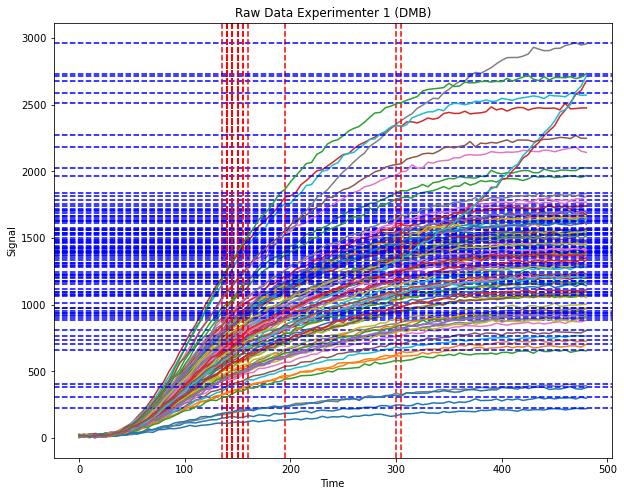

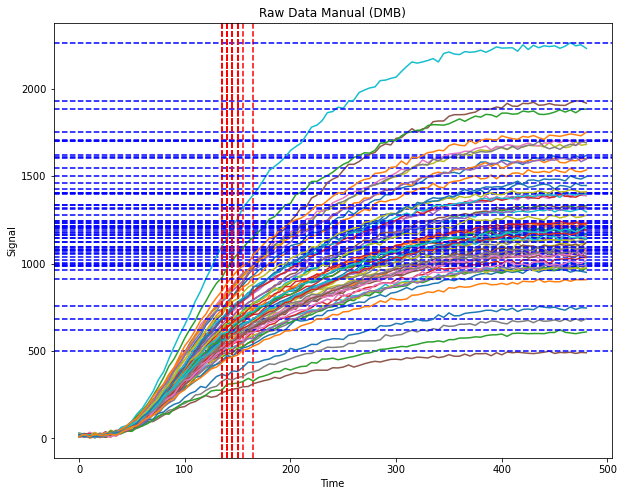

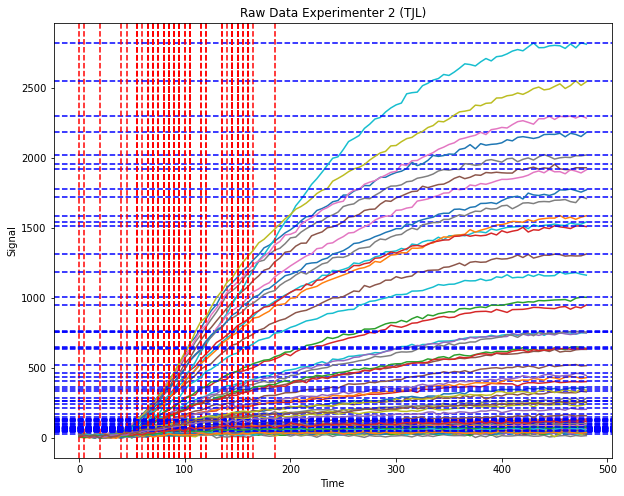

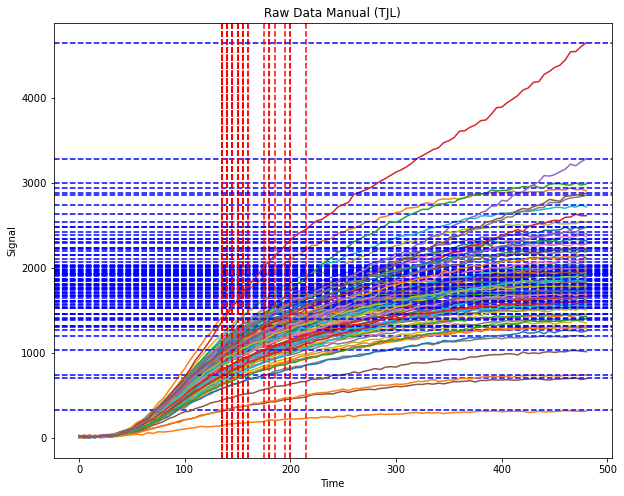

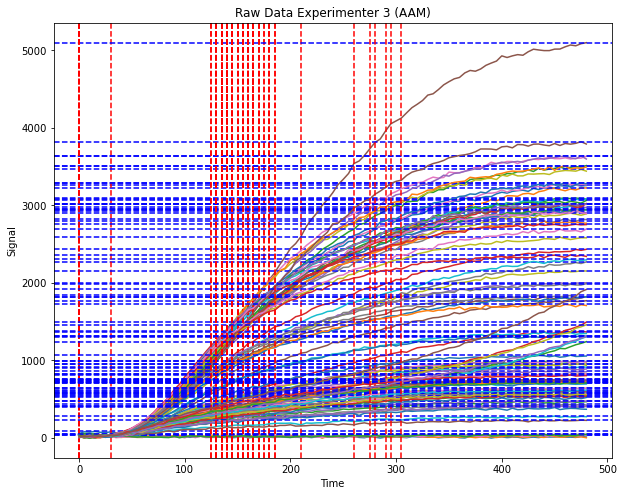

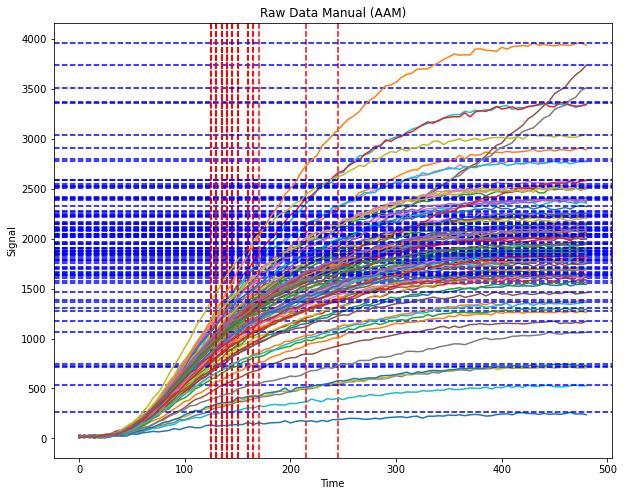

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
xlsx_file = pd.ExcelFile('/Users/dylan/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/77_CBC_Objective_3_Sensor_Scaleup/Supplemental_Information/Supporting Data and Python Files/Supp_Data_Figure_1/Figure_1_Raw_Data_sfGFP.xlsx')
sheet_names = xlsx_file.sheet_names

# Create empty dictionaries to store half-maximum times and maximum signals
half_times = {}
max_signals = {}

# Loop through all sheets
for sheet_name in sheet_names:
    # Read data from sheet
    df = pd.read_excel(xlsx_file, sheet_name=sheet_name)
    x = df['time'].tolist()

    # Create a figure to plot the curves for this sheet
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create empty dictionaries to store half-maximum times and maximum signals for this sheet
    sheet_half_times = {}
    sheet_max_signals = {}

    # Loop through all columns except the 'time' column
    for column in df.columns[1:]:
        y = df[column].tolist()

        # Find half-time
        def find_half_time(x, y):
            max_signal = max(y)
            half_signal = max_signal / 2.0
            for i in range(len(y)):
                if y[i] >= half_signal:
                    return x[i]
            return None

        # Call the function to find half-time
        half_time = find_half_time(x, y)

        # Store half-time in dictionary
        sheet_half_times[str(column)] = half_time

        # Find maximum signal
        max_signal = max(y)

        # Store maximum signal in dictionary
        sheet_max_signals[str(column)] = max_signal

        # Plot the curve and the vertical line (if half_time is not None)
        ax.plot(x, y, label=str(column))
        if half_time is not None:
            ax.axvline(x=half_time, color='r', linestyle='--')
        
        # Plot the maximum signal as a horizontal line
        ax.axhline(y=max_signal, color='b', linestyle='--')

    # Set axis labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Signal')
    ax.set_title(sheet_name)

    # Show legend
    #ax.legend()

    # Show the plot
    plt.show()

    # Store sheet's half-maximum times and maximum signals in the main dictionaries
    half_times[sheet_name] = sheet_half_times
    max_signals[sheet_name] = sheet_max_signals

# Convert dictionaries to dataframes
half_times_df = pd.DataFrame.from_dict(half_times, orient='index')
max_signals_df = pd.DataFrame.from_dict(max_signals, orient='index')

half_times_df.transpose().to_excel('Figure_1_Output_Half_Max_Times_sfGFP.xlsx')
max_signals_df.transpose().to_excel('Figure_1_Output_Max_Signals_sfGFP.xlsx')


T1/2 vs Maximum Signal Plots for Automated and Manual Reactions with a sfGFP Reporter

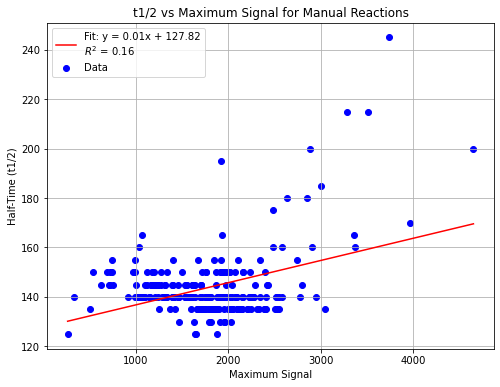

Figure saved as t_half_vs_max_signal_plot_manual_sfGFP.svg


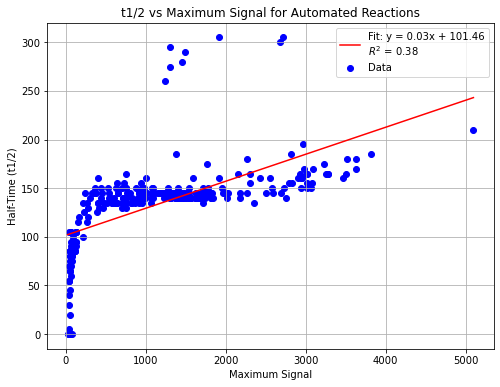

Figure saved as t_half_vs_max_signal_plot_automated_sfGFP.svg


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from Excel file
xlsx_file = pd.ExcelFile('/Users/dylan/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/77_CBC_Objective_3_Sensor_Scaleup/Supplemental_Information/Supporting Data and Python Files/Supp_Data_Figure_1/Figure_1_Raw_Data_sfGFP.xlsx')
sheet_names = xlsx_file.sheet_names

# Create empty dictionaries to store half-maximum times and maximum signals
half_times_manual = {}
max_signals_manual = {}
half_times_automated = {}
max_signals_automated = {}

# Loop through all sheets
for sheet_name in sheet_names:
    # Check if the sheet is "manual" or "automated" based on its name
    is_manual = "manual" in sheet_name.lower()

    # Read data from the sheet
    df = pd.read_excel(xlsx_file, sheet_name=sheet_name)
    x = df['time'].tolist()

    # Create dictionaries to store half-maximum times and maximum signals for this sheet
    sheet_half_times = {}
    sheet_max_signals = {}

    # Loop through all columns except the 'time' column
    for column in df.columns[1:]:
        y = df[column].tolist()

        # Find half-time
        def find_half_time(x, y):
            max_signal = max(y)
            half_signal = max_signal / 2.0
            for i in range(len(y)):
                if y[i] >= half_signal:
                    return x[i]
            return None

        # Call the function to find half-time
        half_time = find_half_time(x, y)

        # Store half-time in dictionary
        sheet_half_times[column] = half_time

        # Find maximum signal
        max_signal = max(y)

        # Store maximum signal in dictionary
        sheet_max_signals[column] = max_signal

    # Add data to the appropriate dictionary
    if is_manual:
        half_times_manual[sheet_name] = sheet_half_times
        max_signals_manual[sheet_name] = sheet_max_signals
    else:
        half_times_automated[sheet_name] = sheet_half_times
        max_signals_automated[sheet_name] = sheet_max_signals

# Function to process and plot data for a reaction type
def process_and_plot(half_times, max_signals, reaction_type):
    # Convert dictionaries to dataframes
    half_times_df = pd.DataFrame.from_dict(half_times, orient='index')
    max_signals_df = pd.DataFrame.from_dict(max_signals, orient='index')

    # Flatten dataframes to single columns for plotting
    t_half_values = half_times_df.transpose().stack().reset_index(drop=True)
    max_signal_values = max_signals_df.transpose().stack().reset_index(drop=True)

    # Plot t1/2 vs max signal
    plt.figure(figsize=(8, 6))
    plt.scatter(max_signal_values, t_half_values, label="Data", color="blue")
    plt.xlabel('Maximum Signal')
    plt.ylabel('Half-Time (t1/2)')
    plt.title(f't1/2 vs Maximum Signal for {reaction_type.capitalize()} Reactions')

    # Fit a linear function
    coefficients = np.polyfit(max_signal_values, t_half_values, 1)  # Linear fit
    linear_fit = np.poly1d(coefficients)

    # Calculate R^2 value
    y_pred = linear_fit(max_signal_values)  # Predicted values from the fit
    ss_res = np.sum((t_half_values - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((t_half_values - np.mean(t_half_values)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)

    # Add the linear fit to the plot
    x_fit = np.linspace(min(max_signal_values), max(max_signal_values), 100)
    y_fit = linear_fit(x_fit)
    plt.plot(x_fit, y_fit, color="red", label=f"Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}\n$R^2$ = {r_squared:.2f}")
    plt.legend()

    # Save the figure as SVG
    output_svg_path = f't_half_vs_max_signal_plot_{reaction_type}_sfGFP.svg'
    plt.savefig(output_svg_path, format='svg')

    # Show the plot
    plt.grid()
    plt.show()
    print(f"Figure saved as {output_svg_path}")

# Process and plot for manual and automated reactions
process_and_plot(half_times_manual, max_signals_manual, "manual")
process_and_plot(half_times_automated, max_signals_automated, "automated")


**Violin Plot Generation**

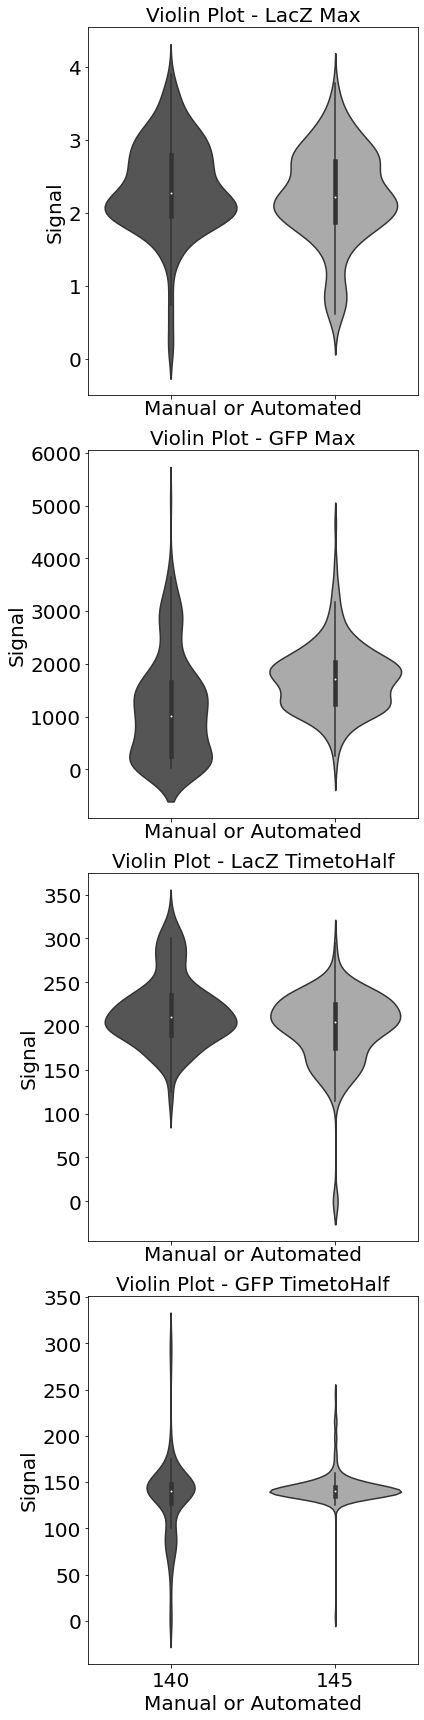

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from Excel file
excel_file = pd.ExcelFile('/Users/dylan/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/77_CBC_Objective_3_Sensor_Scaleup/Supplemental_Information/Supporting Data and Python Files/Supp_Data_Figure_1/Figure_1_Violin_Plot_Raw_Data.xlsx')
sheet_names = excel_file.sheet_names

# Create subplots
fig, axes = plt.subplots(len(sheet_names), 1, figsize=(6, 6*len(sheet_names)), sharex=True)

# Iterate through each sheet and plot on separate subplots
for i, sheet_name in enumerate(sheet_names):
    data_frame = excel_file.parse(sheet_name)
    ax = axes[i]
    sns.violinplot(data=data_frame, ax=ax, palette='gray')

    ax.set_title(f'Violin Plot - {sheet_name}', fontsize=20)
    ax.set_xlabel('Manual or Automated', fontsize=20)
    ax.set_ylabel('Signal', fontsize=20)

    # Set fontsize for axis tick labels
    ax.tick_params(axis='both', which='major', labelsize=20)

    # Save the plot as SVG file
    plt.savefig(f'Figure_1_violin_plot_{sheet_name}.svg', format='svg')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Violin plots for individual experimenters separated for manual (lighter gray) and automated (darker gray) reactions

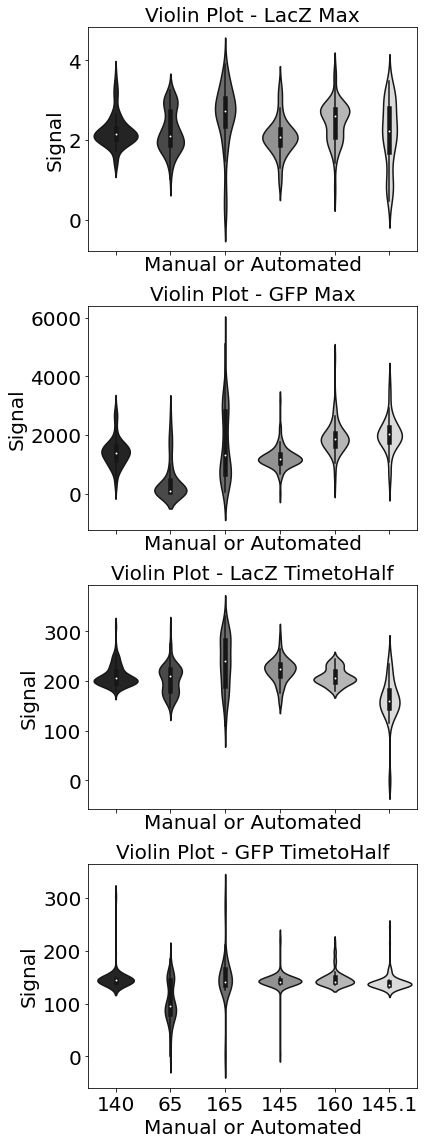

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from Excel file
excel_file = pd.ExcelFile('/Users/dylan/LucksLab Dropbox/LucksLab/Lucks_Lab_Papers/In_Progress/77_CBC_Objective_3_Sensor_Scaleup/Supplemental_Information/Supporting Data and Python Files/Supp_Data_Figure_1/Figure_1_Violin_Plot_Raw_Data_Separate.xlsx')
sheet_names = excel_file.sheet_names

# Create subplots
fig, axes = plt.subplots(len(sheet_names), 1, figsize=(6, 4*len(sheet_names)), sharex=True)

# Iterate through each sheet and plot on separate subplots
for i, sheet_name in enumerate(sheet_names):
    data_frame = excel_file.parse(sheet_name)
    ax = axes[i]
    sns.violinplot(data=data_frame, ax=ax, palette='gray')

    ax.set_title(f'Violin Plot - {sheet_name}', fontsize=20)
    ax.set_xlabel('Manual or Automated', fontsize=20)
    ax.set_ylabel('Signal', fontsize=20)

    # Set fontsize for axis tick labels
    ax.tick_params(axis='both', which='major', labelsize=20)

    # Save the plot as SVG file
    plt.savefig(f'Figure_1_violin_plot_{sheet_name}_Separate.svg', format='svg')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()